# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [114]:
import pandas as pd
import sqlite3
# from sklearn.ensemble import RandomForestClassifier
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.core.display import Image, display

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df = pd.read_csv('/content/drive/MyDrive/ex08_42/am_pm.csv')
df

,data,am,pm,target,predict
0,2020-04-17,23,0,0,0
1,2020-04-20,2,23,0,0
2,2020-04-21,0,25,0,0
3,2020-04-22,1,27,0,0
4,2020-04-23,14,29,0,0
5,2020-04-24,2,14,0,0
6,2020-04-27,4,2,0,0
7,2020-04-28,4,1,0,0
8,2020-04-29,0,17,0,0
9,2020-04-30,13,40,0,0


In [109]:
X = df.drop('target', axis = 1)
X = X.drop('data', axis = 1)
X = X.drop('predict', axis = 1)
X

Index(['am', 'pm'], dtype='object')

In [65]:
y = np.where(df['target'] == 0, 0, 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
clf = LogisticRegression(random_state=21, fit_intercept=False)

In [67]:
clf.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [68]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
plot_x = np.array([min(df['am']) - 2, max(df['am']) + 2])
plot_y = (-1 / clf.coef_[0][1]) * clf.coef_[0][0] * plot_x

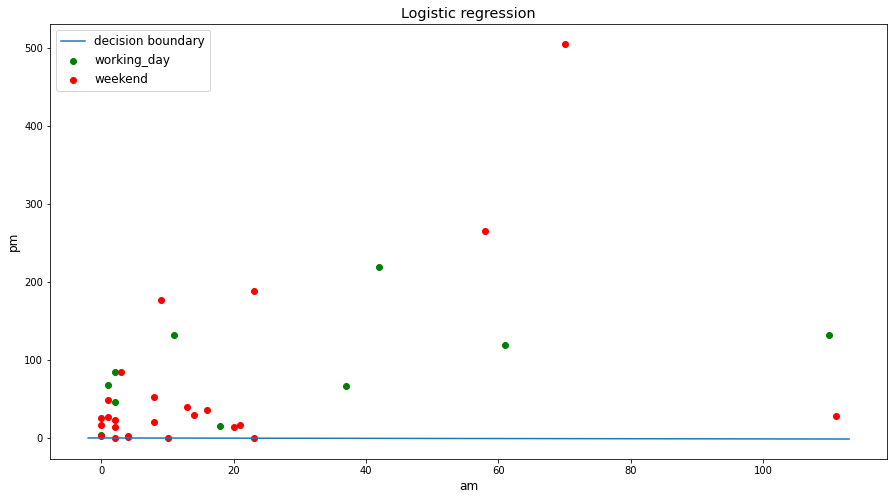

In [70]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df.loc[df['target'] == 1]['am'],
           y=df.loc[df['target'] == 1]['pm'],
           color='green', label='working_day')
ax.scatter(x=df.loc[df['target'] == 0]['am'],
           y=df.loc[df['target'] == 0]['pm'],
           color='red', label='weekend')
ax.plot(plot_x, plot_y, label='decision boundary')
ax.set_title('Logistic regression', fontsize='x-large')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(loc='upper left', fontsize='large')
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [71]:
scaler = StandardScaler()


In [72]:
print(scaler.fit(X))

StandardScaler()


In [73]:
X = (scaler.transform(X))
X

array([[ 0.09795857, -0.71565026],
       [-0.63673072, -0.48521087],
       [-0.70670113, -0.46517267],
       [-0.67171592, -0.44513446],
       [-0.21690827, -0.42509625],
       [-0.63673072, -0.57538281],
       [-0.56676031, -0.69561205],
       [-0.56676031, -0.70563115],
       [-0.70670113, -0.54532549],
       [-0.25189347, -0.31488611],
       [-0.42681949, -0.19465687],
       [ 0.02798816, -0.5553446 ],
       [ 3.17665656, -0.43511536],
       [-0.63673072, -0.71565026],
       [-0.14693786, -0.35496253],
       [-0.60174552,  0.12595445],
       [-0.39183429,  1.05773108],
       [ 1.32244073,  1.93941219],
       [ 0.09795857,  1.16794122],
       [ 1.74226318,  4.34399705],
       [-0.35684908, -0.71565026],
       [-0.70670113, -0.68559295],
       [-0.00699704, -0.57538281],
       [-0.42681949, -0.51526818],
       [-0.67171592, -0.23473328],
       [-0.67171592, -0.03435121],
       [-0.07696745, -0.5653637 ],
       [ 0.58775143, -0.04437032],
       [ 0.76267746,

In [74]:
y = np.where(df['target'] == 0, 0, 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
clf = LogisticRegression(random_state=21, fit_intercept=False)

In [76]:
clf.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [77]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [78]:
accuracy_score(y_pred, y)

0.7142857142857143

In [79]:
y_pred_naive = np.array([np.argmax(np.bincount(y))] * len(y))

In [80]:
accuracy_score(y, y_pred_naive)

0.7142857142857143

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [86]:
clf = SVC(probability=True, random_state=21)

In [87]:
clf.fit(X, y)


SVC(probability=True, random_state=21)

In [88]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [89]:
accuracy_score(y_pred, y)

0.7428571428571429

In [ ]:
plot_x = np.array([min(df['am']) - 2, max(df['am']) + 2])
plot_y = (-1 / clf.coef_[0][1]) * clf.coef_[0][0] * plot_x

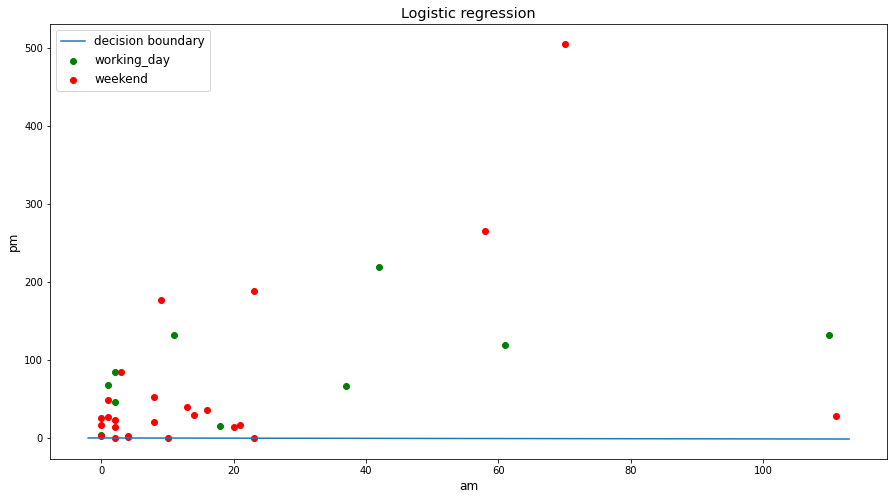

In [93]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df.loc[df['target'] == 1]['am'],
           y=df.loc[df['target'] == 1]['pm'],
           color='green', label='working_day')
ax.scatter(x=df.loc[df['target'] == 0]['am'],
           y=df.loc[df['target'] == 0]['pm'],
           color='red', label='weekend')
ax.plot(plot_x, plot_y, label='decision boundary')
ax.set_title('Logistic regression', fontsize='x-large')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(loc='upper left', fontsize='large')
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [95]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

In [96]:
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [98]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [99]:
accuracy_score(y_pred, y)

0.9714285714285714

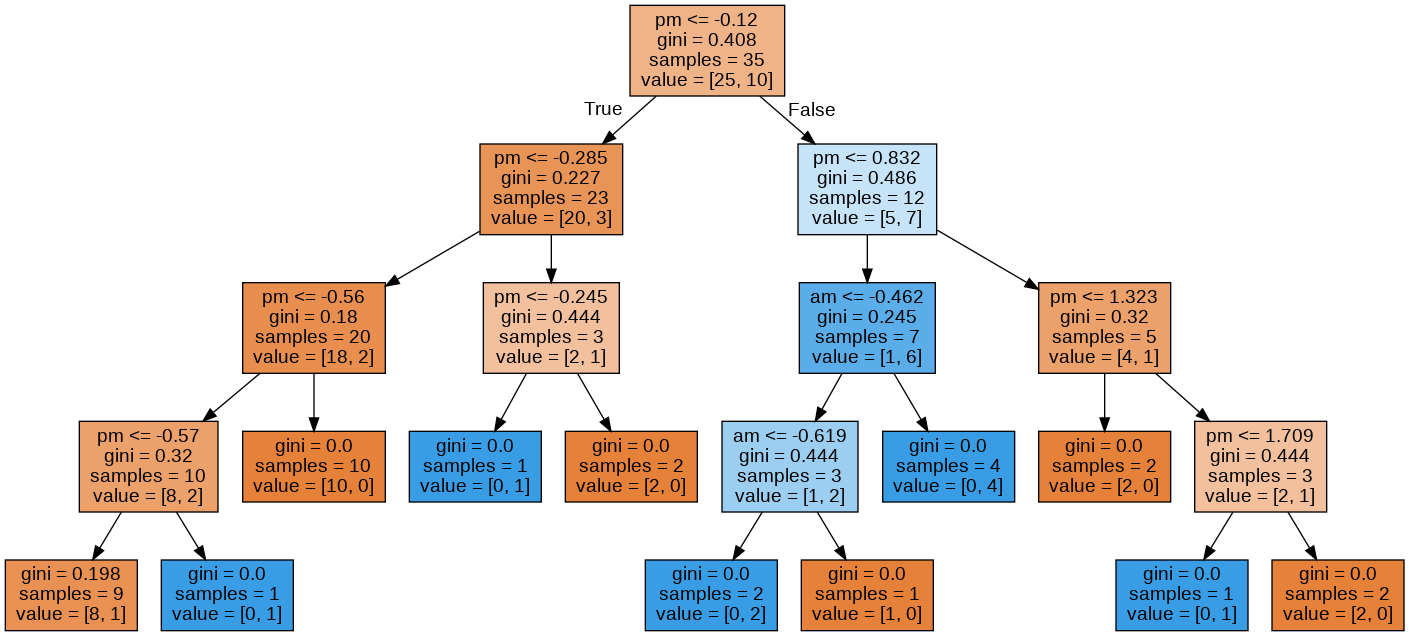

In [115]:
export_graphviz(clf, feature_names=['am', 'pm'] , out_file='tree.dot', filled=True)
!dot -Tpng 'tree.dot' -o 'tree.png'
display(Image('tree.png', unconfined=True))

6